# Multi-Layer Perceptron Model/Deep Neural Networks
The Multi-Layer Perceptron Model functions in much the same way that the single-neuron perceptron model from our very first module functions. However, instead of only having a single layer, we can have multiple layers with multiple outputs (instead of just binary classification). 

This module is going to be slightly different from all the other modules. While the other modules used the different wine classification datasets, I wanted to try something a little different (I was a little sick of wine :), and also the dataset I will be using seemed super interesting. For this module, I will instead be using the fashion mnist dataset. This dataset is similar to the mnist dataset (where you classify the numbers from 0-9), but instead of numbers, we have types of clothing. 

Here are the labels for the different types of clothing:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

There are 70,000 images in this dataset, with each image being a 28x28 pixel picture of one of the above types of clothing. The clothing types have all been classified already, and our job is to train our machine to recognize these types of clothing. 

For this module, we will also try another new thing. While for the past few modules we have been hard coding all of our algorithms, this time I want to try something a little different and instead use tensorflow. Tensorflow is an open sourced library designed by Google that can complete a variety of tasks, but is made especially for deep neural networks, which is exactly what the multi-layer perceptron is. If you want to learn more about the theory behind hard coding the multi-layer perceptron model, you can read about it in the README for this module.

### Import TensorFlow
We can start by importing tensorflow.

In [95]:
import tensorflow as tf

### Import Usual Libraries
Let's also import our usual libraries. We never know if we might need them.

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Import fashion mnist
Now let's import fashion mnist from our tensorflow. It is one of the built-in datasets.

In [97]:
from tensorflow.keras.datasets import fashion_mnist

### Split Data and Standardize
Now let's split all of our data into training and testing data. After splitting our data, we also need to standardize it. Because we know that all of our values are between 0 and 255 (the scale used to plot the gray-scale), we can just divide everything by 255 so that all of our values are between 0 and 1.

In [99]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0

### Plot clothing types
Let's plot the ten different clothing types, just to see what some of them might look like.

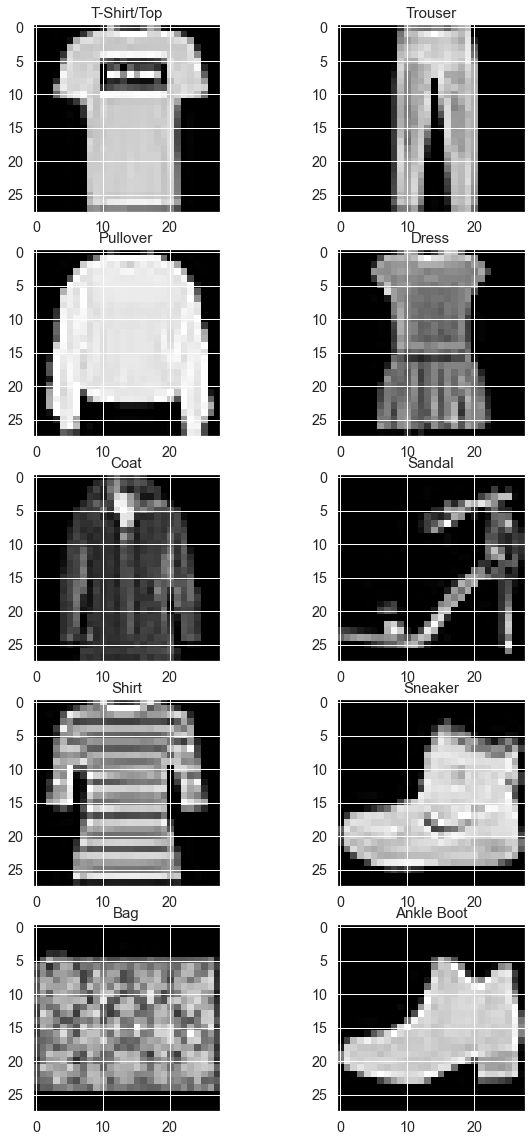

In [100]:
categories = ["T-Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
types =[1, 16, 7, 3, 19, 8, 26, 0, 23, 15]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(5, 2, figsize=(10,20))

# Loop over the axs and types
for ax, type, category in zip(axs.flat, types, categories):
    ax.imshow(X_train[type], cmap = 'gray')
    ax.set_title(f'{category}', fontsize = 15)

### Create TensorFlow Model
We now create the TensorFlow model. For this model, we set a number of steps within the model. First, in order to run the multi-layer perceptron model, we have to flatten our matrices. We know that each matrix (corresponding to each apparel item) is currently 28x28. When we flatten it, it becomes 748x1. We then put this matrix into multiple hidden neural layers using tf.keras.layers.Dense before it spits out a 10x1 matrix containing one of the categories. 

In [125]:
tf.random.set_seed(1)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(160, activation='relu'),
  tf.keras.layers.Dense(80),
  tf.keras.layers.Dense(40),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(10)
])

### Test model
Let's see what happens when we run the model on the first 28x28 matrix. We get some numbers that aren't easy to analyze.

In [126]:
predictions = model(X_train[:1]).numpy()
predictions

array([[-1.1424555 ,  1.0924654 , -0.8645275 ,  0.27753   , -0.37787244,
        -0.40666068, -1.0736899 , -0.01946231,  1.1912268 , -1.6092852 ]],
      dtype=float32)

### Find Softmax
Let's now find the softmax for our predictions. This means that based on our predictions, we can calculate the probability of a certain index occurring. As we can see, the index with the highest probability is index 8.

In [127]:
predictions = tf.nn.softmax(predictions).numpy()
predictions

array([[0.02846853, 0.26605955, 0.03758959, 0.11777603, 0.0611532 ,
        0.05941781, 0.03049506, 0.08751344, 0.2936773 , 0.01784939]],
      dtype=float32)

### Compare prediction with actually data
As we can see, the first data point is actually supposed to be 9, which is an ankle boot, instead of 8, which is a bag. Of course, this is because we are missing a major component: we still need to train our model!

In [128]:
predictions = np.argmax(predictions, axis=1)
display(predictions)
display(y_train[:1])

array([8], dtype=int64)

array([9], dtype=uint8)

### Define Loss Function
First we define the loss function, which we set as the cross entropy loss function.

In [129]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

### Compile Model
Now we compile the model. We set the optimizer to be adam, the loss function to be the cross entropy loss function, and the metric to be accuracy.

In [130]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

### Train Model
Now we train the model use the fit function and using five epochs. We can see that with each epoch the accuracy goes up until we get pretty high accuracy, though the increase in accuracy does slow over each epoch.

In [131]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4888 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3735 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3438 - accuracy: 0.8749
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3255 - accuracy: 0.8806
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3073 - accuracy: 0.8864


### Test Model
We can also test how our model did by using our testing data. We can see that the model does a pretty good job of predicting the labels. It does have about 87% accuracy, after all!

In [133]:
model.evaluate(X_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.3570 - accuracy: 0.8746 - 494ms/epoch - 2ms/step


[0.3569994866847992, 0.8745999932289124]

### Break down accuracy
We can also break down our accuracy farther by plotting the confusion matrix and displaying the classification report. First, we need to get the predicted values, though. We first get the arrays for each prediction.

In [134]:
y_pred = model.predict(X_test)

### Find softmax
Again, we find the softmax, or the probability that our prediction is any one indice.

In [135]:
y_pred = tf.nn.softmax(y_pred).numpy()

### Find index with highest probability
Now we find the index for each array with the highest probability so that we can compare these labels with those of the actual outputs.

In [136]:
y_pred = np.argmax(y_pred, axis=1)

### Plot Confusion Matrix
We can now plot the confusion matrix for our data. We can see that overall our model did a really good job at classifying our data. However, we can also see that there are a few items that our model seems to get especially confused by. For example, our model seems to commonly mix up 0 and 6, which are T-Shirts/Tops and Shirts. This, of course, makes a lot of sense, because T-Shirts/Tops and Shirts can be hard to distinguish, even by us humans!

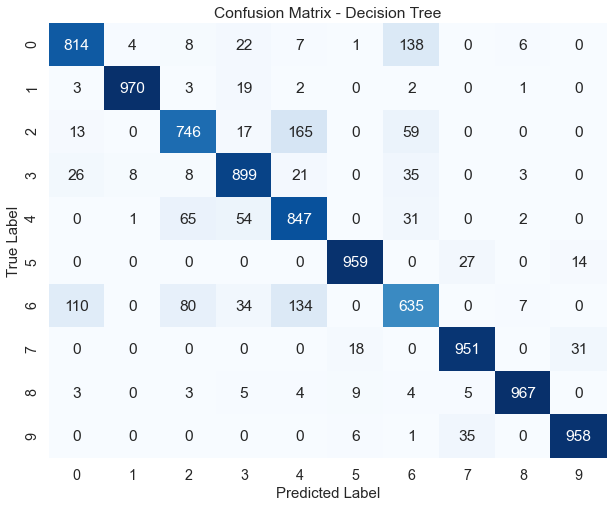

In [138]:
import seaborn as sns

# Import metrics from sklearn 
from sklearn import metrics

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "Blues", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

### Display classification report
We can also display the classification matrix for our model. As we can see, 1 and 8 seem to have the highest accuracy, which makes sense, as these are trousers and bags, the most distinct items in the various categories.

In [139]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.75      0.78      1000
           3       0.86      0.90      0.88      1000
           4       0.72      0.85      0.78      1000
           5       0.97      0.96      0.96      1000
           6       0.70      0.64      0.67      1000
           7       0.93      0.95      0.94      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



## Takeaways
As we can see, the multi-layer perceptron model is a very powerful model. It can classify items with very high accuracy. TensorFlow also makes this process very simple. In fact, for some of the categories like T-Shirts/Tops vs. Shirts, I would almost say that our model probably would do a better job at distinguishing between these items than we as humans would!